y_true class distribution: {0, 1}


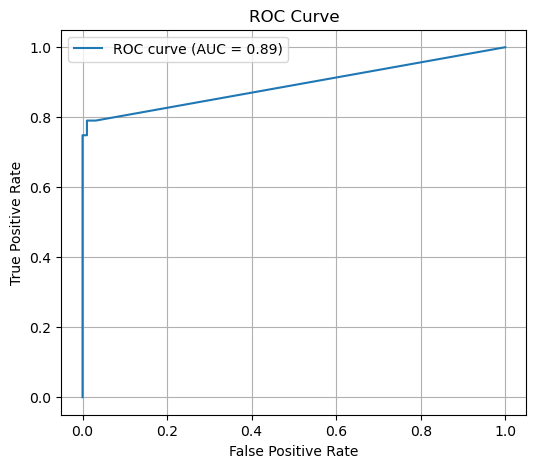

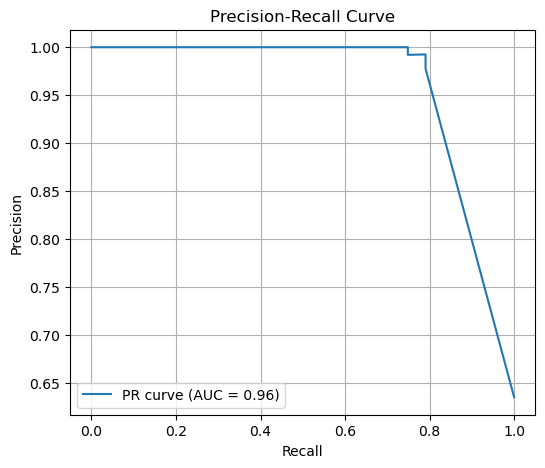

✅ Evaluation Metrics:
F1 Score: 0.7630
AUC-ROC: 0.8915
AUC-PR (Average Precision): 0.9591
Precision @ 80% Recall: 0.6350


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    auc, f1_score
)

GT_FOLDER = r"C:\Users\User\Desktop\COMPUTER ENGR\NLB_Research\eval\labels"
PRED_FOLDER = r"C:\Users\User\Desktop\COMPUTER ENGR\NLB_Research\model_predictions\my_phone_test\labels"

y_true = []
y_scores = []

for fname in os.listdir(GT_FOLDER):
    if not fname.endswith(".txt"):
        continue

    gt_path = os.path.join(GT_FOLDER, fname)
    pred_path = os.path.join(PRED_FOLDER, fname)

    # GT: Healthy = 0, NCLB = 1
    with open(gt_path, "r") as f:
        lines = f.readlines()
        gt_label = 0 if len(lines) == 0 else 1
        y_true.append(gt_label)

    # Prediction confidence (YOLOv8 format: class cx cy w h conf)
    if os.path.exists(pred_path):
        with open(pred_path, "r") as f:
            preds = f.readlines()
            if preds:
                # Get max confidence score for this image
                confs = [float(p.strip().split()[-1]) for p in preds]
                y_scores.append(max(confs))
            else:
                y_scores.append(0.0)
    else:
        y_scores.append(0.0)

# Ensure both classes exist
print("y_true class distribution:", set(y_true))

if len(set(y_true)) < 2:
    print("❌ Not enough variation in y_true.")
else:
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # PR Curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)

    # F1 Score at threshold 0.5
    y_pred_bin = [1 if s >= 0.5 else 0 for s in y_scores]
    f1 = f1_score(y_true, y_pred_bin)

    # Precision @ 80% Recall
    target_recall = 0.80
    prec_at_recall = 0
    for p, r in zip(precision, recall):
        if r >= target_recall:
            prec_at_recall = p
            break

    # Plot ROC
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot PR
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    # Results Summary
    print("✅ Evaluation Metrics:")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print(f"AUC-PR (Average Precision): {pr_auc:.4f}")
    print(f"Precision @ 80% Recall: {prec_at_recall:.4f}")
